In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

In [3]:
abalone

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
abalone.columns = [
  "Sex",
  "Length",
  "Diameter",
  "Height",
  "Whole weight",
  "Shucked weight",
  "Viscera weight",
  "Shell weight",
  "Rings"]

#เลือก Feature ที่ต้องการใช้

In [5]:
abalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#describe()

In [6]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


แสดงความสัมพันธ์


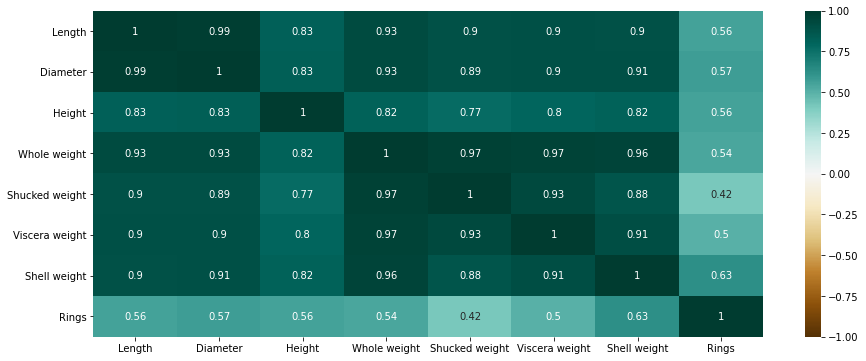

In [8]:
plt.figure(figsize=(15, 6))
sns.heatmap(abalone.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG');

เลือก Input

In [9]:
X = abalone.drop("Sex", axis=1)
Xv = X.values
y = abalone["Sex"]
yv = y.values

In [10]:
X.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
y.head(5)

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [12]:
y.describe()

count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object

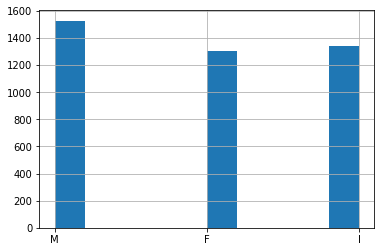

In [13]:
y.hist()

ให้สังเกตุค่า y ซึ่งเป็น label  มีทั้งหมด 3 class

#Splitting Data Into Training and Test Sets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


In [15]:
X_train, X_test, y_train, y_test = train_test_split(Xv, yv, test_size=0.3)   # แบ่งข้อมูลเป็น 2 ส่วน  70/30

In [16]:
X_train

array([[ 0.365 ,  0.28  ,  0.09  , ...,  0.036 ,  0.0605,  7.    ],
       [ 0.595 ,  0.465 ,  0.15  , ...,  0.2745,  0.289 , 11.    ],
       [ 0.545 ,  0.435 ,  0.165 , ...,  0.2665,  0.325 , 19.    ],
       ...,
       [ 0.64  ,  0.5   ,  0.18  , ...,  0.314 ,  0.431 , 11.    ],
       [ 0.435 ,  0.35  ,  0.11  , ...,  0.1005,  0.125 , 13.    ],
       [ 0.58  ,  0.44  ,  0.145 , ...,  0.1645,  0.242 , 10.    ]])

In [17]:
X_train.shape, X_test.shape

((2923, 8), (1254, 8))

#Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler


In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[-1.30217778, -1.26739421, -1.24068871, ..., -1.30478572,
        -1.26169157, -0.9074344 ],
       [ 0.6070563 ,  0.59529827,  0.29771617, ...,  0.88063479,
         0.3873161 ,  0.36197491],
       [ 0.19200541,  0.29324003,  0.68231739, ...,  0.80732928,
         0.64711599,  2.90079353],
       ...,
       [ 0.98060209,  0.94769955,  1.06691861, ...,  1.24258074,
         1.41208235,  0.36197491],
       [-0.72110654, -0.56259165, -0.72788708, ..., -0.71376005,
        -0.79621676,  0.99667956],
       [ 0.48254103,  0.34358307,  0.16951576, ..., -0.12731597,
         0.0481329 ,  0.04462258]])

# Create model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)


#Fit knn

In [23]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#Classification

In [24]:
y_pred = classifier.predict(X_test)

#Evaluating the Algorithm 

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

from IPython.display import display, Image, SVG, Math, YouTubeVideo

In [26]:
Image(url='https://www.researchgate.net/profile/Frank-Krueger-2/publication/314116591/figure/fig7/AS:614085901185031@1523420896093/Confusion-matrix-for-multi-class-classification-The-confusion-matrix-of-a.png')

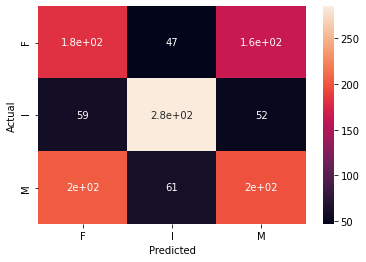

In [27]:
confusion_matrix1 = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix1, annot=True)

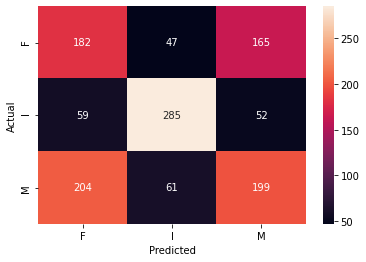

In [28]:
confusion_matrix1 = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix1, annot=True, fmt='g');

In [29]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[182  47 165]
 [ 59 285  52]
 [204  61 199]]
              precision    recall  f1-score   support

           F       0.41      0.46      0.43       394
           I       0.73      0.72      0.72       396
           M       0.48      0.43      0.45       464

    accuracy                           0.53      1254
   macro avg       0.54      0.54      0.54      1254
weighted avg       0.53      0.53      0.53      1254



![image.png](https://miro.medium.com/max/700/0*LI_eHocnrOK3KiJD.png)

#LAB
ปรับแก้โค้ดต่อไปให้  ให้สามารถบันทึก โมเดล ได้

In [33]:
import pickle

# save the model to disk

filename = 'finalized_model.sav'
pickle.dump(logistic_regression, open(filename, 'wb'))  # classifier
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.5311004784688995


-----------------------------------